\begin{titlepage}
\centering
\vspace*{4cm}

{\Huge \textbf{Anscombe Quartet Data Visualisation}}\\[1.5cm]

{\Large \textbf{Author:} Brian Lim}\\[0.3cm]
{\Large \textbf{Course:} TER3 F2025}\\[0.3cm]
{\Large \textbf{Instructor:} Mr. Andrade}\\[0.3cm]
{\Large \textbf{Date:} October 31, 2025}\\[4cm]

\vfill
\end{titlepage}

\newpage

## Executive Summary: 
This notebook explores Anscombe's quartet using summary statistics and visualizations.  
Even though all four datasets share very similar statistical summaries, their scatterplots have very different patterns.  
This demonstrates why visual inspection is important in Exploratory Data Analysis

## Introduction: 
Anscombe's quartet consists of four datasets that have very similar statistical properties. Despite this, each dataset has very different patterns when visualized. This highlights a principle in Exploratory Data Analysis, showing that only presenting numerical summaries can be misleading and can withhold vital pieces of information. This notebook performs EDA on Anscombe's quartet using summary statistics, scatter pots with regression lines and residual plots to illustrate the differnces between the datasets and to emphasize the importance of creating a presentation with both visual and numerical analysis. 

## Data:
The dataset being used is Anscombe's quartet, which nicludes four datasets labeled I, II, III, and IV. Each dataset contains x and y values. The data is loaded from a CSV file (but in this case hardcoded) into a pandas DataFrame for analysis. 

In [6]:
import pandas as pd

data = {
    "dataset": ["I"]*11 + ["II"]*11 + ["III"]*11 + ["IV"]*11,
    "x": [
        10,8,13,9,11,14,6,4,12,7,5,
        10,8,13,9,11,14,6,4,12,7,5,
        10,8,13,9,11,14,6,4,12,7,5,
        8,8,8,8,8,8,8,19,8,8,8
    ],
    "y": [
        8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68,
        9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74,
        7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73,
        6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89
    ]
}

df = pd.DataFrame(data)
df.head()

,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


## Methods:
For each dataset in Ancombe's quartet, the following analyses were performed:
- **Summary Statistics:**
    - Mean
    - Variance
    - Standard deviation
    - Covariance
    - Correlation
    - Regression
    - Coefficients
    - R²
- **Visualizations:**
    - Scatter plots with regression lines
    - Residual plots
    - Overlaid comparison plot
    - Box plots of X and Y distributions
    - Interactive version (link)

## Summary Statistics and Linear Regression Formulas

Below are the main summary statistics and regression formulas used in this report, along with brief definitions.

---

##### **1. Mean**
*Definition:* The mean is the average of all data points; it represents the central value of a dataset.

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

---

##### **2. Sample Variance**
*Definition:* Measures how much the data points deviate from the mean, on average (in squared units).

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

---

##### **3. Sample Standard Deviation**
*Definition:* The square root of the variance; shows spread of data in the same units as the data.

$$
s = \sqrt{s^2} = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

---

##### **4. Covariance**
*Definition:* Measures how two variables vary together; positive means they increase together, negative means they vary inversely.

$$
\text{cov}(X,Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

---

##### **5. Pearson Correlation**
*Definition:* Standardized covariance showing strength and direction of a linear relationship between two variables; ranges from -1 to 1.

$$
r = \frac{\text{cov}(X,Y)}{s_X s_Y} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

---

##### **6. Linear Regression (Least Squares)**
*Definition:* Finds the best-fitting line \(y = mx + b\) that minimizes the sum of squared errors.

**Slope:**
$$
m = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

**Intercept:**
$$
b = \bar{y} - m \bar{x}
$$

---

##### **7. Coefficient of Determination**
*Definition:* Measures how well the regression line explains variability in the dependent variable; ranges from 0 to 1.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

## Summary Statistics:
The summary statistics are calculated with the following code, creating the table that calculates the mean, variance, standard deviation, covarance, correlation, slope, intercept and R²

In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

summary = []

for name, subset in df.groupby("dataset"):
    x = subset["x"]
    y = subset["y"]
    mean_x = x.mean()
    mean_y = y.mean()
    var_x = x.var()
    var_y = y.var()
    sd_x = x.std()
    sd_y = y.std()
    cov = np.cov(x, y, ddof=0)[0, 1]
    corr = x.corr(y)
    model = sm.OLS(y, sm.add_constant(x)).fit()
    slope = model.params.iloc[1]
    intercept = model.params.iloc[0]
    r2 = model.rsquared
    summary.append([name, mean_x, mean_y, var_x, var_y, sd_x, sd_y, cov, corr, slope, intercept, r2])

summary_table = pd.DataFrame(summary, columns=[
    "Dataset", "Mean X", "Mean Y", "Variance X", "Variance Y",
    "SD X", "SD Y", "Covariance", "Correlation (r)", 
    "Slope", "Intercept", "R²"
])

summary_table

,Dataset,Mean X,Mean Y,Variance X,Variance Y,SD X,SD Y,Covariance,Correlation (r),Slope,Intercept,R²
0,I,9.0,7.500909,11.0,4.127269,3.316625,2.031568,5.000909,0.816421,0.500091,3.000091,0.666542
1,II,9.0,7.500909,11.0,4.127629,3.316625,2.031657,5.000000,0.816237,0.500000,3.000909,0.666242
2,III,9.0,7.500000,11.0,4.122620,3.316625,2.030424,4.997273,0.816287,0.499727,3.002455,0.666324
3,IV,9.0,7.500909,11.0,4.123249,3.316625,2.030579,4.999091,0.816521,0.499909,3.001727,0.666707


## Visualization:


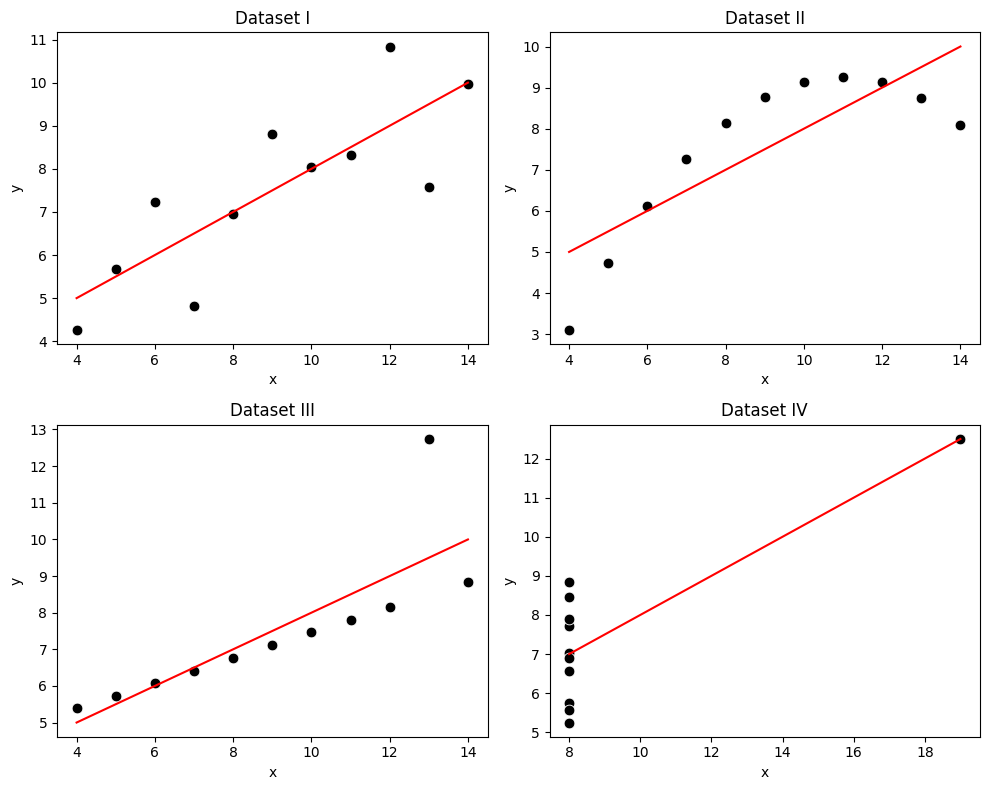

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
datasets = df["dataset"].unique()

for i, dataset in enumerate(datasets):
    subset = df[df["dataset"] == dataset]
    sns.scatterplot(x="x", y="y", data=subset, ax=axes[i//2, i%2], s=60, color="black")
    X = sm.add_constant(subset["x"])
    model = sm.OLS(subset["y"], X).fit()
    slope, intercept = model.params["x"], model.params["const"]
    x_vals = np.linspace(subset["x"].min(), subset["x"].max(), 100)
    y_vals = intercept + slope * x_vals
    axes[i//2, i%2].plot(x_vals, y_vals, color="red")
    axes[i//2, i%2].set_title(f"Dataset {dataset}")

plt.tight_layout()
plt.show()


## Scatterplot
The graphs above visualize the different datasets that some outliers. A regression line (or a line of best fit) has been drawn so the overall points can be visualized into a pattern. Some datasets, specifically dataset III and IV include outliers that seem very far from the predicted pattern of the regression line. 

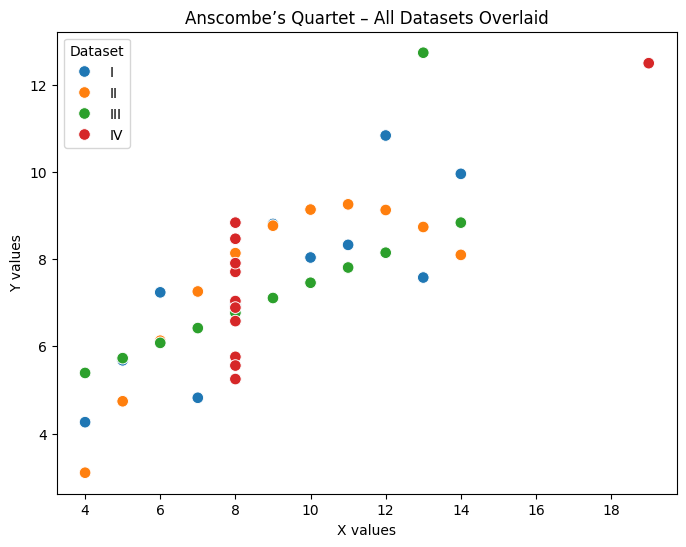

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="x", y="y", hue="dataset", s=70)
plt.title("Anscombe’s Quartet – All Datasets Overlaid")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend(title="Dataset")
plt.show()

## Overlaid Compaison Plot
This graphs showcases the points of data overlaid across each other with the same X and Y axis'. They are colour coded for a clearer view and for the reader to be able to distinguish where data points are coming from. 


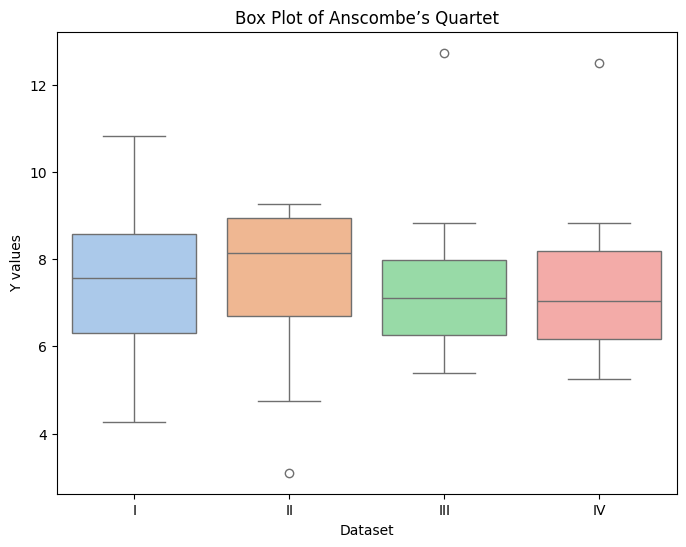

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="dataset", y="y", hue="dataset", palette="pastel", legend=False)
plt.title("Box Plot of Anscombe’s Quartet")
plt.xlabel("Dataset")
plt.ylabel("Y values")
plt.show()

## Box Plot
Boxes look to average out at around the value of $y = 7.5$ excet for Dataset II, showing how the line is also extending quite shorter in height as there is not much variance compared to the other datasets.

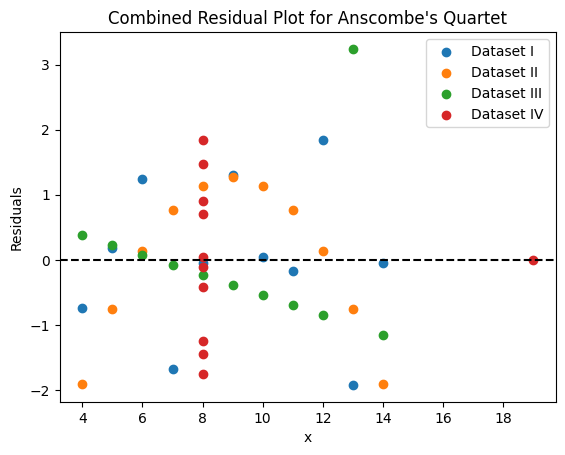

In [8]:
for dataset in df['dataset'].unique():
    data_subset = df[df['dataset'] == dataset]
    x = data_subset['x']
    y = data_subset['y']
    m = ((x - x.mean()) * (y - y.mean())).sum() / ((x - x.mean())**2).sum()
    b = y.mean() - m * x.mean()
    y_pred = m * x + b
    residuals = y - y_pred
    plt.scatter(x, residuals, label=f'Dataset {dataset}')

plt.axhline(0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title("Combined Residual Plot for Anscombe's Quartet")
plt.legend()
plt.show()

## Residual Plot
The point of the Residual Plot tells us about the actal y compared to the predicted y value. You wil see the points are mostly scattered around the $y = 0$ line, with some outliers here and there. 

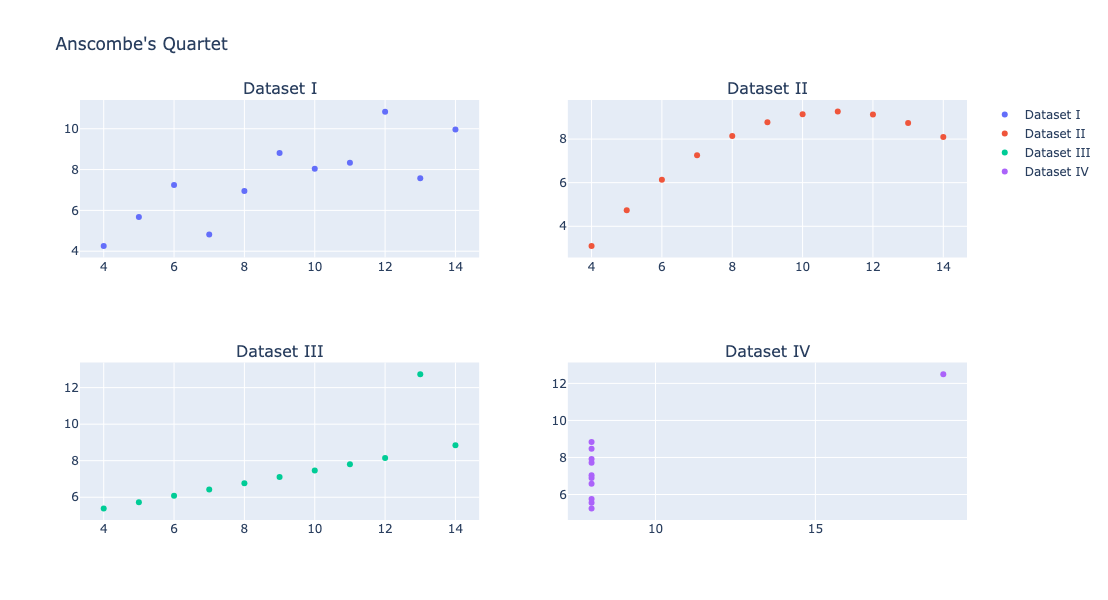

In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2, 
    subplot_titles=["Dataset I", "Dataset II", "Dataset III", "Dataset IV"]
)

datasets = ["I", "II", "III", "IV"]
positions = [(1,1), (1,2), (2,1), (2,2)]

for ds, pos in zip(datasets, positions):
    subset = df[df["dataset"] == ds]
    fig.add_trace(
        go.Scatter(x=subset["x"], y=subset["y"], mode="markers", name=f"Dataset {ds}"),
        row=pos[0], col=pos[1]
    )

fig.update_layout(height=600, width=800, title_text="Anscombe's Quartet")
fig.show()

In [10]:
fig.write_html("anscombe_quartet.html")

## Interpretation:
All four datasets have similar statistics, their scatter plots show different patterns. 

Dataset 1 looks like it is fully random, but when drawing a line of best fit, it looks like a $y = x$ linear relationship.

Dataset 2 shows a slight curve pattern overall, mimicing a $y=-x^2$ relationship

Dataset 3 shows a typical linear relationship of $y = -x$ except for one outlier

Dataset 4 shows that almost all x-values are the same except for one outlier

These graphs - scatter plots, regression lines, resdiual plots and box plots have been used because summary statistics by themselves can be misleading. All four datasets have the same mean, variance, and correlation, but the residual plots reveal differences in patterns, nonlinearity, and outliers. 

These graphs desmontrate why visualizing data is cruicial before coming to a conclusion. 




## Conclusion:
In conclusion, the residual plots of Anscombe’s quartet demonstrate that similar summary statistics do not guarantee similar data behavior. While all four datasets share the same mean, variance, and linear regression equation $y = mx + b$, the residuals reveal very different patterns: Dataset I fits the linear model well, Dataset II shows a nonlinear trend, and Datasets III and IV are affected by outliers. This highlights the importance of visualizing data using different types of graphs—scatter plots, regression lines, and residual plots before interpreting results. Overall, residual analysis is a powerful tool for assessing model fit, detecting nonlinearity, and identifying influential points that can skew conclusions.